<a href="https://colab.research.google.com/github/MahoganiRJones/MahoganiRJones.github.io/blob/main/Capstone_III_Bank_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hypothesis Python Environment Testing of Bank Finance Data**

> The focus of this notebook is to describe the procedure for performing statistical analysis and hypothesis testing on a dataset that ***consists of 1 Million+ transactions by over 800K customers for a bank in India***.

## *Data Analysis:* Understanding the Customer with Bank Customer Segmentation

  Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more.

  Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.



It would be interesting to answer two questions that could increase bank profits by understanding a customers transaction history:



1.   Is there any correlation between age, transaction amount and account balance?
2.   Is there a significant difference in the average account balance between female and male?


Dataset columns to be explored are:

> **Transaction Amount** - Amount of money debited from an account balance in connection with a purchase or use of funds

> **Customer Account Balance** - Running balance in account after each customer transaction.

> **Age** - Age of account holder in which the transaction was debited from.


> **Customer Gender** - Gender of account holder in which the transaction was debited from.

> **Customer DOB** - Date of birth of account holder in which the transaction was debited from.


##**GDrive link to dataset:**
https://drive.google.com/file/d/1e0VV6Kbx8bgq4Q8spuu-Va-1pMdSZurC/view?usp=sharing

##**Kaggle link to dataset:**
https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation?select=bank_transactions.csv

# Import Modules

In [ ]:
# import packages as needed

import math
import numpy as np
import pandas as pd
from datetime import date
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# this adjusts pandas setting for floats and round them to 2 decimals.
# when excecuting describe(), float dtypes printed scientific notation
# reviewed with a TA and this fix was found
pd.options.display.float_format = '{0:10.2f}'.format

# Load and Describe Data

In [ ]:
# read in the GDrive-mounted CSV
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in data
bank_df = pd.read_csv('bank_transactions.csv')

# rows and column dimensions?
bank_df.shape

(1048567, 9)

In [ ]:
# see the information for our dataframe
print('--- info ---')
bank_df.info()

--- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
# see the first 5 and last five rows
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.00
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.00
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.00
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.00


**Observation:**

There is over a million rows of data! I noticed a small amount of nulls compared to the amount of data. The dtype for DOB need to be manipulated to calculate age, TransactionDate should be datetime, TransactionAmount and CustAccountBalance should be int64 for the purposes of this test, and 5 columns have missing data. Would like to know more about CustomerID or TransactionID.

# Clean and uncover quality issues

In [ ]:
# are there duplicates?
bank_df[bank_df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [ ]:
# how many nulls in each column?
bank_df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
# checking for rows with a null in any row
null_rows = bank_df[bank_df.isnull().any(axis=1)]   # rows(0), columns(1)

print("There are {} rows with a null out of {} rows in the dataset".format(len(null_rows),len(bank_df)))
null_rows.head(10)

There are 6953 rows with a null out of 1048567 rows in the dataset


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
29,T30,C8736958,19/12/86,M,GRAM PANCHAYTH HYDERABAD,NaN,3/8/16,160636,2600.00
176,T177,C5698953,1/1/1800,NaN,NAVI MUMBAI,8512.28,12/8/16,155727,3449.00
222,T223,C9022645,NaN,M,BHIWANDI,1730.30,21/10/16,150814,4000.00
1271,T1272,C2314972,29/7/93,M,THANE,NaN,21/10/16,203227,53.00
1495,T1496,C2515550,NaN,M,NEW DELHI,384.07,21/10/16,193326,2800.00
2124,T2125,C4525944,1/1/1800,NaN,BANGALORE,7115.05,21/10/16,201052,584.06
2256,T2257,C7383573,1/11/90,M,NaN,262645.74,21/10/16,204113,96.00
2513,T2514,C3742855,18/3/87,F,MUMBAI,NaN,21/10/16,150602,300.00
2574,T2575,C1934132,NaN,F,MUMBAI,34058.49,21/10/16,152147,1800.00
2831,T2832,C3221342,27/2/02,M,NEW DELHI,NaN,21/10/16,54746,1.00


In [ ]:
# where are these nulls?
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 29 to 1048472
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            6953 non-null   object 
 1   CustomerID               6953 non-null   object 
 2   CustomerDOB              3556 non-null   object 
 3   CustGender               5853 non-null   object 
 4   CustLocation             6802 non-null   object 
 5   CustAccountBalance       4584 non-null   float64
 6   TransactionDate          6953 non-null   object 
 7   TransactionTime          6953 non-null   int64  
 8   TransactionAmount (INR)  6953 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 543.2+ KB


**Observation:**

Nulls are random and account for 0.7% of data. Will delete

In [ ]:
# dropping all nulls
print("The starting size of bank_df is {}".format(len(bank_df)))

bank_df = bank_df.dropna()

print("The size of the in progress dataframe is {}".format(len(bank_df)))

The starting size of bank_df is 1048567
The size of the in progress dataframe is 1041614


In [ ]:
# changing dtype for TransactionDate to datetime and update format
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], format = '%d/%m/%y')

In [ ]:
# dropping column TransactionTime
bank_df.drop(['TransactionTime'], axis=1, inplace=True)
print('The columns of the DataFrame after deleting inplace')
print(bank_df.columns)

The columns of the DataFrame after deleting inplace
Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionAmount (INR)'],
      dtype='object')


In [ ]:
# confirming updates
bank_df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                        object
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionAmount (INR)           float64
dtype: object

In [ ]:
# counting CustomerDOB
bank_df['CustomerDOB'].value_counts()

1/1/1800    56292
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
2/12/51         1
20/3/52         1
26/9/47         1
4/10/41         1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

**Observation:**

Date 1/1/1800 is a possible unknown birthday and will remove. Dates are not all same format, will match and check for entries such as 2057 as year which should be 1957. 

In [ ]:
# finding and cleaning up CustomerDOB suspicous info. Changing date format
bank_df = bank_df.loc[~(bank_df['CustomerDOB'] == '1/1/1800')]
bank_df['CustomerDOB'] = pd.to_datetime(bank_df['CustomerDOB'], format = '%d/%m/%y')
bank_df.loc[bank_df['CustomerDOB'].dt.year >= 2022, ['CustomerDOB']] -= pd.DateOffset(years = 100)
bank_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.00
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,459.00
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50


In [ ]:
# creating function to calculate age
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

In [ ]:
# calculating age from CustomerDOB
bank_df['Age'] = bank_df.CustomerDOB.apply(age)

**Checking structure to see cleaning so far**

In [ ]:
# cleaning spot check
bank_df.info()
print('--- first 5 and last 5 lines of data ---')
bank_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            985322 non-null  object        
 1   CustomerID               985322 non-null  object        
 2   CustomerDOB              985322 non-null  datetime64[ns]
 3   CustGender               985322 non-null  object        
 4   CustLocation             985322 non-null  object        
 5   CustAccountBalance       985322 non-null  float64       
 6   TransactionDate          985322 non-null  datetime64[ns]
 7   TransactionAmount (INR)  985322 non-null  float64       
 8   Age                      985322 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 75.2+ MB
--- first 5 and last 5 lines of data ---


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,28
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,27999.00,65
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,459.00,26
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00,49
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,34
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-04-08,M,NEW DELHI,7635.19,2016-09-18,799.00,32
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,460.00,30
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,770.00,33
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,1000.00,44


In [ ]:
# see the descriptive statistics
bank_df.describe()

,CustAccountBalance,TransactionAmount (INR),Age
count,985322.00,985322.00,985322.00
mean,106061.19,1452.43,37.05
std,817905.35,6139.77,8.75
min,0.00,0.00,1.00
25%,4582.13,151.00,31.00
50%,16006.30,431.00,35.00
75%,53759.08,1125.00,40.00
max,115035495.10,1560034.99,100.00


In [ ]:
# counting of all categories (categorical data)
bank_df.describe(exclude = 'number')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,TransactionDate
count,985322,985322,985322,985322,985322,985322
unique,985322,839081,17232,2,8164,55
top,T1,C3226689,1989-01-01 00:00:00,M,MUMBAI,2016-08-07 00:00:00
freq,1,6,809,712454,97679,26022
first,NaN,NaN,1922-10-20 00:00:00,NaN,NaN,2016-08-01 00:00:00
last,NaN,NaN,2021-01-19 00:00:00,NaN,NaN,2016-10-21 00:00:00


**Observation:**

**NaN is represented when categorical data can not be aggregated**

The count and unique count for TransactionID match, confirming no duplicate transactions.

Customer ID unique count shows that the same customer made multiple transactions during the capture time period, which is also referenced as 55 days of transctions listed under unique count of TransactionDate.

# Exploratory Data Analysis

In [ ]:
# counting the unique values within CustLocation
# listing the top 25 CustLocations
print("There are {} unique locations where customers spend their money".format(bank_df['CustLocation'].nunique()))

bank_counts1 = bank_df['CustLocation'].value_counts()
print(bank_counts1.head(25))

There are 8164 unique locations where customers spend their money
MUMBAI           97679
BANGALORE        77751
NEW DELHI        76380
GURGAON          70518
DELHI            67335
NOIDA            31675
CHENNAI          27500
PUNE             24493
HYDERABAD        21819
THANE            21006
KOLKATA          19033
GHAZIABAD        14624
NAVI MUMBAI      11932
AHMEDABAD        11266
FARIDABAD        10641
JAIPUR            9231
CHANDIGARH        8801
LUCKNOW           7338
MOHALI            5828
SURAT             5173
NASHIK            4645
LUDHIANA          4354
VISAKHAPATNAM     4173
DEHRADUN          3961
INDORE            3620
Name: CustLocation, dtype: int64


In [ ]:
# When are these transactions taking place?
bank_df['TransactionDate'].value_counts()

2016-08-07    26022
2016-08-13    25478
2016-09-04    25392
2016-08-06    25267
2016-09-03    25102
2016-09-10    24424
2016-09-11    24308
2016-08-14    24262
2016-08-15    23001
2016-08-21    21655
2016-09-02    21541
2016-08-12    21115
2016-09-01    21019
2016-08-09    20489
2016-08-11    20461
2016-09-08    20447
2016-08-10    20352
2016-09-09    20308
2016-08-27    20130
2016-08-20    20031
2016-09-05    20024
2016-09-07    19904
2016-08-05    19890
2016-08-28    19874
2016-08-17    19763
2016-08-08    19647
2016-08-02    19631
2016-08-04    19428
2016-09-13    19391
2016-09-12    19385
2016-08-03    19274
2016-08-01    19213
2016-08-16    19065
2016-09-14    18573
2016-09-15    18482
2016-09-06    18440
2016-08-31    18368
2016-08-18    18302
2016-08-19    17394
2016-08-22    17339
2016-08-25    17335
2016-08-24    16647
2016-08-26    16463
2016-08-30    16119
2016-08-23    16056
2016-08-29    15534
2016-09-18    13902
2016-09-26    11541
2016-09-25     7766
2016-09-27     6910


**Observation:**

Transactions take place between August 2016 and October 2016

In [ ]:
# counting unique values within CustGender  (ttest)
# listing the top 10 CustGender
print("There are {} unique genders".format(bank_df['CustGender'].nunique()))

bank_counts2 = bank_df['CustGender'].value_counts()
print(bank_counts2.head(10))

There are 2 unique genders
M    712454
F    272868
Name: CustGender, dtype: int64


**Observation:**

Males make up ~72.3% of transcations

In [ ]:
# counting the unique values within Age
# listing the top 10 Ages 
print("There are {} different ages".format(bank_df['Age'].nunique()))

bank_counts1 = bank_df['Age'].value_counts()
print(bank_counts1.head(10))

There are 99 different ages
32    72488
31    71055
33    69288
30    66342
34    63004
35    58782
36    53066
29    52959
37    46170
38    41133
Name: Age, dtype: int64


**Observation:**

Customer ages 32 make the most transctions in there account

In [ ]:
# creating crosstab of record count for gender and CustAccountBalance (ttest)
pd.crosstab(bank_df['CustAccountBalance'], bank_df['CustGender'])

CustGender,F,M
CustAccountBalance,,
0.00,499,1607
0.01,139,159
0.02,16,63
0.03,0,27
0.04,24,51
...,...,...
50999668.50,0,13
61382213.47,0,1
69799329.59,0,4


In [ ]:
# Creating a crosstab of record count for age and customer gender (ttest)
pd.crosstab(bank_df['Age'], bank_df['CustGender'])

CustGender,F,M
Age,,
1,0,22
2,0,2
3,7,0
4,1,0
6,0,2
...,...,...
96,0,10
97,1,0
98,3,0


**Observation:**

Customer ages range from 1 to 100

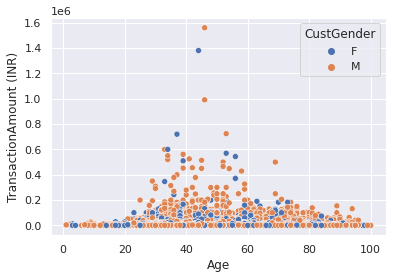

In [ ]:
# scatter plotting transaction amount and age by gender
sns.scatterplot(x='Age', y='TransactionAmount (INR)', hue='CustGender', data=bank_df)

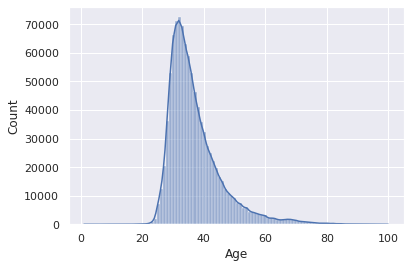

In [ ]:
# plotting the distribution of age
sns.histplot(bank_df['Age'], bins=100, kde = True)

# Analyze the Dataset
## Hypothesis 1:

> There is no correlation between age, transaction amount and account balance. This means that customers who are older do not spend more money with a pattern difference based on account balance.



I will use pairplots and the Pearson correlation coefficient to check correlation.

In [ ]:
# checking for correlation
bank_df[['Age', 'TransactionAmount (INR)', 'CustAccountBalance']].corr()

,Age,TransactionAmount (INR),CustAccountBalance
Age,1.00,0.10,0.12
TransactionAmount (INR),0.10,1.00,0.06
CustAccountBalance,0.12,0.06,1.00




> The values are all close to 0 which would imply there is no relationship between age, transaction amount, and account balance.


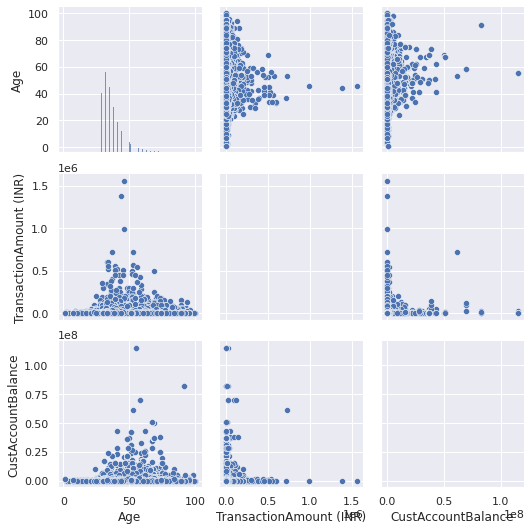

In [ ]:
# making a pairplot of
sns.pairplot(bank_df, vars = ['Age', 'TransactionAmount (INR)', 'CustAccountBalance'])

In [ ]:
# testing: returns correlation coefficient (r) and a p-value for Age and CustomerAccount Balance
stats.pearsonr(bank_df['Age'],bank_df['CustAccountBalance'])

(0.1221270681275636, 0.0)

In [ ]:
# testing: returns correlation coefficient (r) and a p-value for Age and TransactionAmount
stats.pearsonr(bank_df['Age'],bank_df['TransactionAmount (INR)'])

(0.1025557168143813, 0.0)

Given the results of our t-test, we can conclude:

**There is a statistically significant correlation between age, transaction amount and customer account balance. Hypothesis rejected**


### *Summary of findings for hypothesis 1:*


The pairwise correlation and pairplot shows that there is a difference between age, transaction amount and account balance. A person's age does determine how much they will spend or their account balance. 
P-value small at 0.0 confirming a statistically significan difference.


> I recommend we perform transaction related analysis. This will identify when and why our customers spend their money. We have direct in-house data to explore.

# Analyze the Dataset
## Hypothesis 2:

> There is no difference in the account average balance between female and male customers.


I will test this at the 95% significance level.

I will use the independent samples t-test to test the likelihood of a linear correlation existing between average account balances between genders.

In [ ]:
# creating two datasets: one with records for males and one for females
female_bank = bank_df.loc[bank_df['CustGender'] == 'F'] #pivot table filtered to female = F
male_bank = bank_df.loc[bank_df['CustGender'] == 'M']  #pivot table filtered to male = M

# confirming pivot
female_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272868 entries, 0 to 1048558
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            272868 non-null  object        
 1   CustomerID               272868 non-null  object        
 2   CustomerDOB              272868 non-null  datetime64[ns]
 3   CustGender               272868 non-null  object        
 4   CustLocation             272868 non-null  object        
 5   CustAccountBalance       272868 non-null  float64       
 6   TransactionDate          272868 non-null  datetime64[ns]
 7   TransactionAmount (INR)  272868 non-null  float64       
 8   Age                      272868 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 20.8+ MB


In [ ]:
# confirming pivot
female_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Age
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,25.00,28
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,459.00,26
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,2060.00,49
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,1762.50,34
5,T6,C1536588,1972-10-08,F,ITANAGAR,53609.20,2016-08-02,676.00,50


In [ ]:
# testing: returns t statistic and a p-value
stats.ttest_ind(female_bank['CustAccountBalance'], male_bank['CustAccountBalance'])

Ttest_indResult(statistic=-3.4610887057163704, pvalue=0.0005380182854134056)

> **<0.05? Yes, p-value is below 0.05 level**

***Confidence Interval Levels***

In [ ]:
# creating c.i. function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(female_bank['CustAccountBalance'], male_bank['CustAccountBalance'])


'The difference in means at the 95% confidence interval (two-tail) is between 2775.2254631261553 and 9970.886487571892.'

Given the results of our t-test, we can conclude:

**I can say with 95% confidence that there is a statistically significant difference in the average account balance between female and male customers. P-value is 0.00053 -- Hypothesis rejected.**


##Summary of findings for hypothesis 2:

The p-value is < 0.05 and this means that the male customers on average had a higher account balance than the female bank customers. Using the confidence interval, I can quantify account difference between female and male customers is between 2775 and 9970 Rupees on average.



> I recommend targeting female customers. The female economy controls $20T in consumer spending as of year 2009. In aggregate, women represent a growth market bigger than China AND India combined—more than twice as big, in fact.

